In [1]:
%load_ext autoreload
%autoreload 2
import sys, os, inspect
# Load python source folder
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
srcdir = os.path.join(parentdir, "src")
if srcdir not in sys.path: sys.path.insert(0, srcdir)
print(sys.path)

['/home/lex/Work/bse/nbody/DynBinEv/src', '/home/lex/Work/bse/nbody/DynBinEv/eqs', '/home/lex/Work/bse/nbody/DynBinEv/eqs', '/home/lex/PythonScripts', '/usr/lib64/python39.zip', '/usr/lib64/python3.9', '/usr/lib64/python3.9/lib-dynload', '', '/home/lex/.local/lib/python3.9/site-packages', '/home/lex/.local/lib/python3.9/site-packages/ParsecTK-0.0.3-py3.9.egg', '/usr/lib64/python3.9/site-packages', '/usr/lib/python3.9/site-packages', '/usr/lib/python3.9/site-packages/IPython/extensions', '/home/lex/.ipython']


In [25]:
from macega_phasevol import MacegaPhaseEvolve
from macega_nbody import MacegaKick
from amuse.units import units, constants
import numpy as np
from timeit import default_timer as timer

m1, m2 = 35 | units.MSun, 82 | units.MSun
a0 = 4000 | units.RSun
a1 = 40 | units.RSun
e0 = 0.2
ome0 = np.pi/2
nu0 = 3*np.pi/2

mu = (m1 + m2)*constants.G
C = 1e-5
X = 0.1
C_l2k0, Lex, Tex = MacegaPhaseEvolve.C_from_X(X, mu, a0, l=2, k=0)
print("C:", C_l2k0.as_string_in(units.yr**Tex *units.RSun**Lex))

#### SECULAR l=2, k=0
CEvolve = MacegaPhaseEvolve(l=2, k=0)
CEvolve.initialize_system(m1, m2, a0, e0, ome0, nu0, C=C, a1=a1)
start = timer()
t, a, e, ome, nu, g = CEvolve.run_system(tfin=CEvolve.Period0*20, dt_out=CEvolve.Period0*0.001)
end = timer()
print(phtime:=end - start)

C: 7.957747154594767e-06 yr**0 * RSun**-1.0
Mass units: 2.54495602902e-09 MSun
C units: length**-1 * time**0
C = 1e-05 in 1.43781452193e-09 * m**-1
Period0 = 7.413393724101269 yr
Eps_ce/Eps0 99.0
B0: 2.36420719914e+18
a/adot = -0.566778 Periods
Reached final semimajor axis, halting integration
2.2988236480014166


In [23]:
#### NBODY l=2, k=0
CEKickEvolve = MacegaKick(l=2, k=0, dtkick=0.01)
CEKickEvolve.initialize_model(m1, m2, a0, e0, ome0, nu0, afin=a1, C=C)
start = timer()
t_nb, a_nb, e_nb, ome_nb, nu_nb = CEKickEvolve.run_model(tfin = CEKickEvolve.Period0*20, dt_out = CEKickEvolve.Period0*0.001, check_collisions=False)
end = timer()
print(nbtime:=end - start)

Mass units: 2.54495602902e-09 MSun
C units: length**-1 * time**0
Period = 7.4133937241 yr
Period = 7.4133937241 yr
Steps per period: = 0.01
Eps_ce/Eps0 99.0
C: 1e-05 1.43781452193e-09 * m**-1
111.360315580001044 a= 40.0011806729 e= 0.0121965415972 m= [35.0, 82.0] MSun 0.0406827352546 m= [35.0, 82.0] MSun 0.054841761665 m= [35.0, 82.0] MSun17.4684698848 a= 594.136195757 e= 0.0453828479998 m= [35.0, 82.0] MSun577.942210681 e= 0.0422346159866 m= [35.0, 82.0] MSun [35.0, 82.0] MSun[35.0, 82.0] MSun0.0461676840445 m= [35.0, 82.0] MSun[35.0, 82.0] MSun0.0444592046088 m= [35.0, 82.0] MSun [35.0, 82.0] MSun e= 0.0380106402236 m= [35.0, 82.0] MSune= 0.0275574790626 m= [35.0, 82.0] MSun [35.0, 82.0] MSune= 0.0348094314357 m= [35.0, 82.0] MSun 0.0275419113105 m= [35.0, 82.0] MSun22.3256922656 a= 194.612596463 e= 0.0273038636432 m= [35.0, 82.0] MSun 0.0247049166066 m= [35.0, 82.0] MSun e= 0.0202965543244 m= [35.0, 82.0] MSunm= [35.0, 82.0] MSun e= 0.0210734970714 m= [35.0, 82.0] MSune= 0.020008634

In [26]:
print(nbtime/phtime)

48.44230468779849


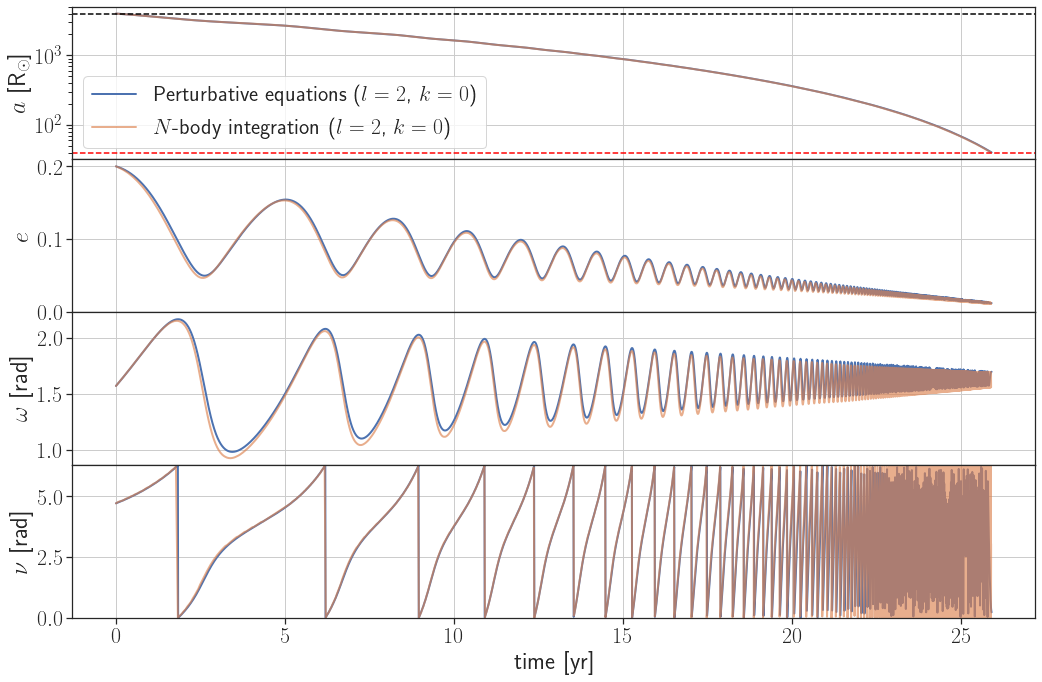

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(font_scale=2, rc={'text.usetex' : True})
sns.set_style("ticks")

f, ax = plt.subplots(4, sharex=True, figsize=(15, 10))

ax[0].plot(t, a, lw=2, label="Perturbative equations ($l=2$, $k=0$)")
ax[0].plot(t_nb, a_nb, lw=2, alpha=0.66, label="$N$-body integration ($l=2$, $k=0$)")

ax[0].set_ylabel("$a$ [R$_\odot$]")
ax[0].axhline(a0.value_in(units.RSun), c="black", ls="--")
ax[0].axhline(a1.value_in(units.RSun), c="red", ls="--")
ax[0].legend()
#ax[0].set_title("e0 = {:g}".format(e0))
ax[0].set_yscale("log")

ax[1].plot(t, e, lw=2)
ax[1].plot(t_nb, e_nb, lw=2, alpha=0.66, label="$N$-body integration ($l=2$, $k=0$)")
ax[1].set_ylabel("$e$")
ax[1].set_xlabel("time [yr]")
ax[1].set_ylim(bottom=0)

ax[2].plot(t, ome, lw=2)
ax[2].plot(t_nb, ome_nb, lw=2, alpha=0.66)
ax[2].set_ylabel("$\\omega$ [rad]")
ax[2].set_xlabel("time [yr]")
ax[2].set_ylim()

ax[3].plot(t, nu, lw=2)
ax[3].plot(t_nb, nu_nb, lw=2, alpha=0.66)
ax[3].set_ylabel("$\\nu$ [rad]")
ax[3].set_xlabel("time [yr]")
ax[3].set_ylim(bottom=0, top=2 * np.pi)
plt.tight_layout()

for axx in ax: axx.grid(True)

f.subplots_adjust(hspace=0)

plt.show()
f.savefig("nbody_comp.pdf")